# Data Analysis

## Class distribution

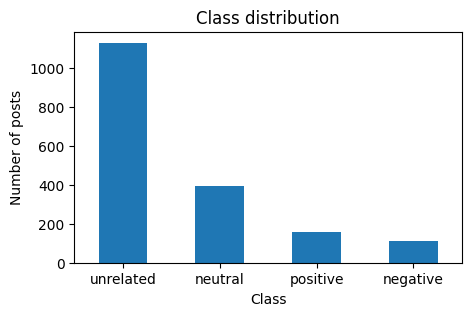

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# # Cargar los datos
# column_names = ['id', 'keyword', 'text', 'label']
# df = pd.read_csv('data/SMM4H_2024_Task3_Training_1800.csv', usecols=column_names)

import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

def lemmatize_words(words):
    return [lemmatizer.lemmatize(word.lower()) for word in words if word.isalnum()]

def filter_sentences(row):
    # Assuming keywords are separated by commas and possibly spaces
    keywords = [lemmatizer.lemmatize(word) for word in row['keyword'].replace(' ', '').split(',')]
    text = row['text']
    sentences = sent_tokenize(text)
    
    # Filter sentences that contain at least one lemmatized keyword
    filtered_sentences = set()  # Use a set to prevent duplicates
    for index, sentence in enumerate(sentences):
        words = lemmatize_words(word_tokenize(sentence))
        if any(keyword in words for keyword in keywords):
            # Add previous sentence if it exists
            if index > 0:
                filtered_sentences.add(sentences[index - 1])
            # Add current sentence
            filtered_sentences.add(sentence)
            # Add next sentence if it exists
            if index < len(sentences) - 1:
                filtered_sentences.add(sentences[index + 1])

    return ' '.join(sorted(filtered_sentences)) if filtered_sentences else text  # Return original text if no keywords found


df = pd.read_csv('data/SMM4H_2024_Task3_Training_1800.csv', usecols=['id', 'keyword', 'text', 'label'])

# Lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply the function to filter sentences in the text
df['text'] = df.apply(filter_sentences, axis=1)


# 1 - positive
# 2 - neutral
# 3 - negative
# 0 - unrelated
label_mapping = {1: 'positive', 2: 'neutral', 3: 'negative', 0: 'unrelated'}
df['label'] = df['label'].map(label_mapping)

# Contar el número de publicaciones en cada categoría
class_counts = df['label'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
class_counts.plot(kind='bar')
plt.title('Class distribution')
plt.xlabel('Class')
plt.ylabel('Number of posts')
plt.xticks(rotation=0)
plt.show()


## Keyword distribution per class

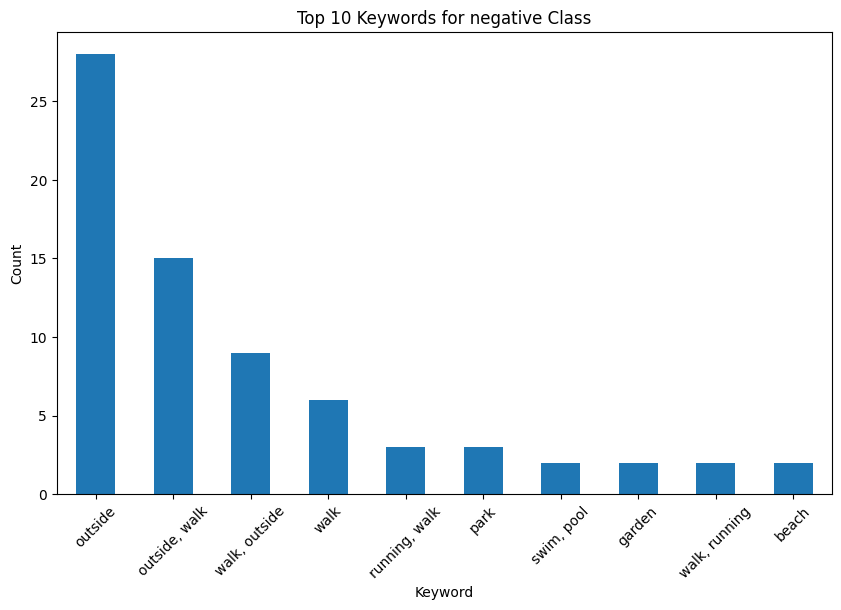

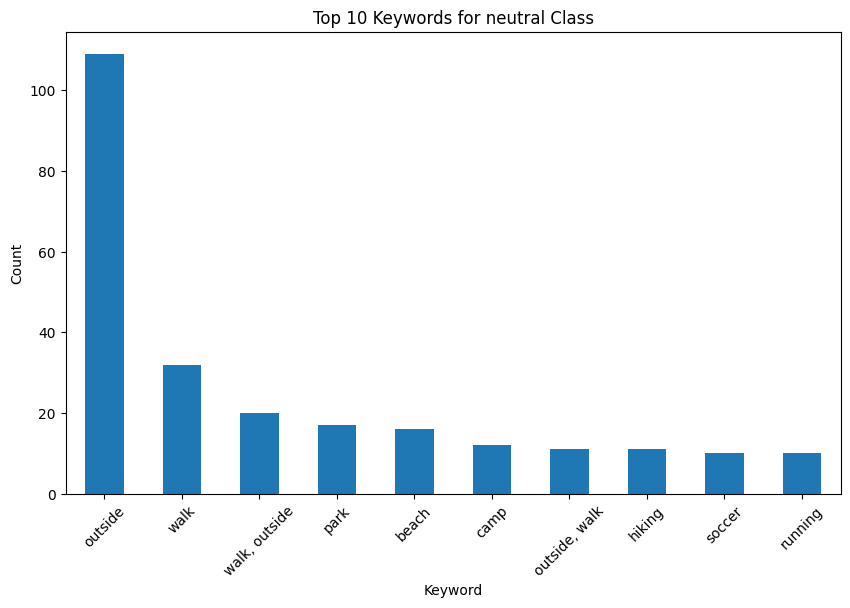

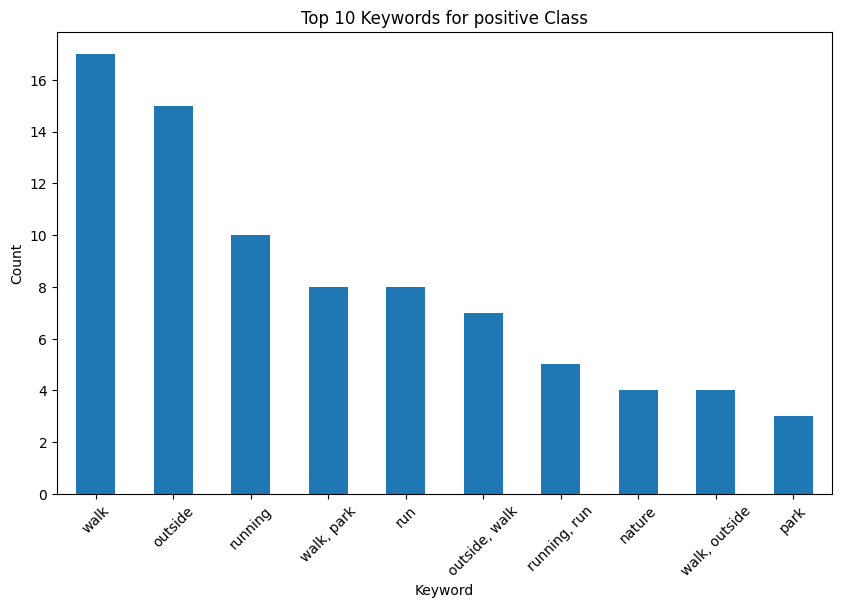

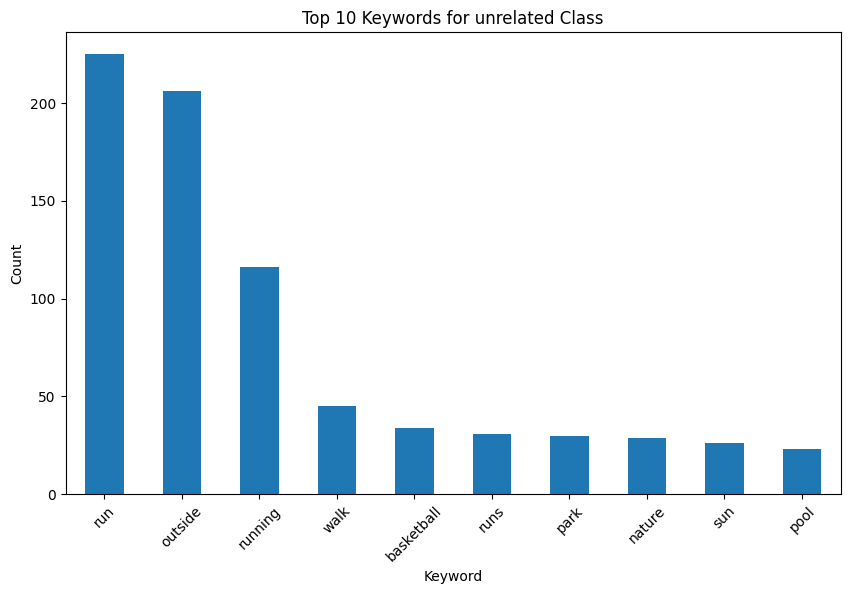

In [2]:
# Group the data by label and keyword, and count the number of occurrences
# keyword_counts_by_class = df.groupby(['label', 'keyword']).size().unstack(fill_value=0)

# Print the keyword counts for each class
# print(keyword_counts_by_class)

# Group the data by label and keyword, and count the number of occurrences
keyword_counts_by_class = df.groupby(['label', 'keyword']).size().unstack(fill_value=0)

# Plot the 10 most frequent keywords for each class
for label in keyword_counts_by_class.index:
    plt.figure(figsize=(10, 6))
    keyword_counts_by_class.loc[label].sort_values(ascending=False).head(10).plot(kind='bar')
    plt.title(f'Top 10 Keywords for {label} Class')
    plt.xlabel('Keyword')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Result: What really sticks out is that in the positive class, the keyword 'walk' has the highest number in relation to the other keywords.

### Keyword distribution in percentage per class (Necessary because of highly inbalanced data)

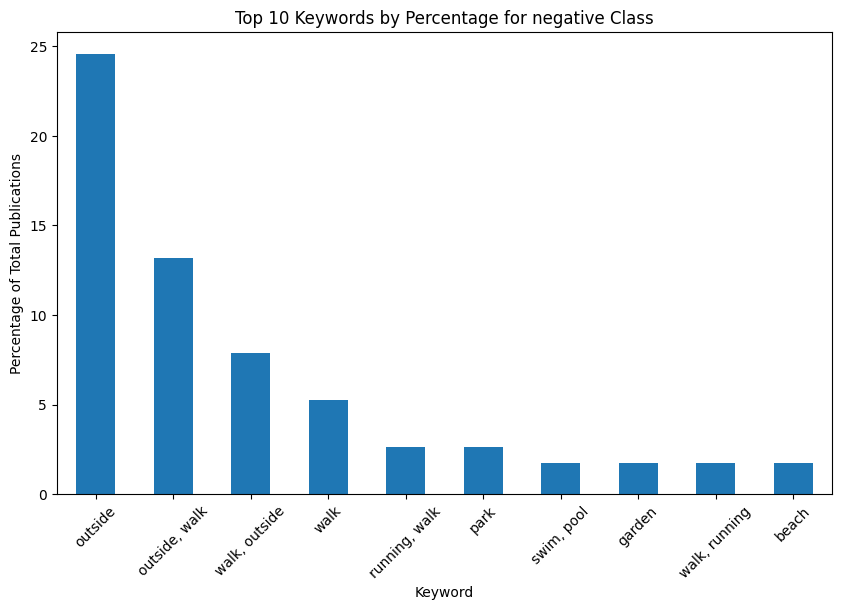

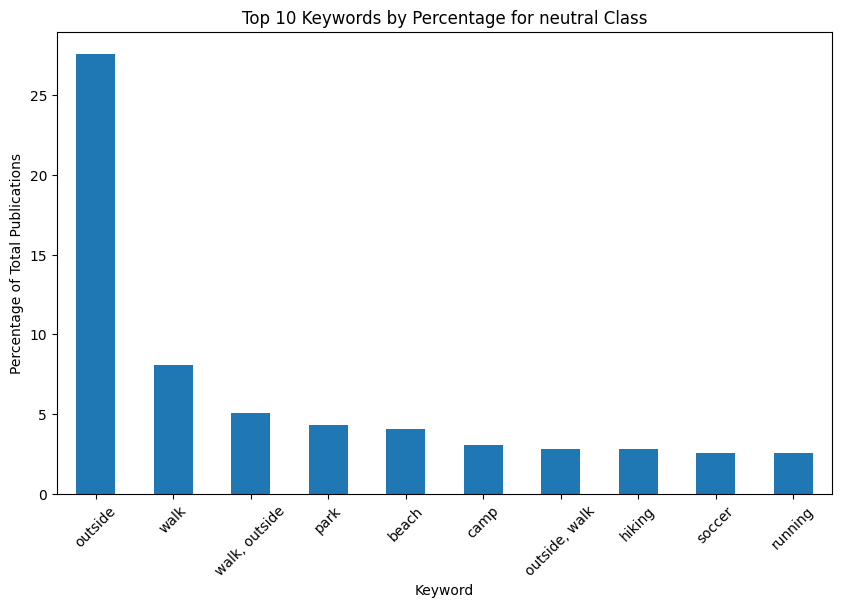

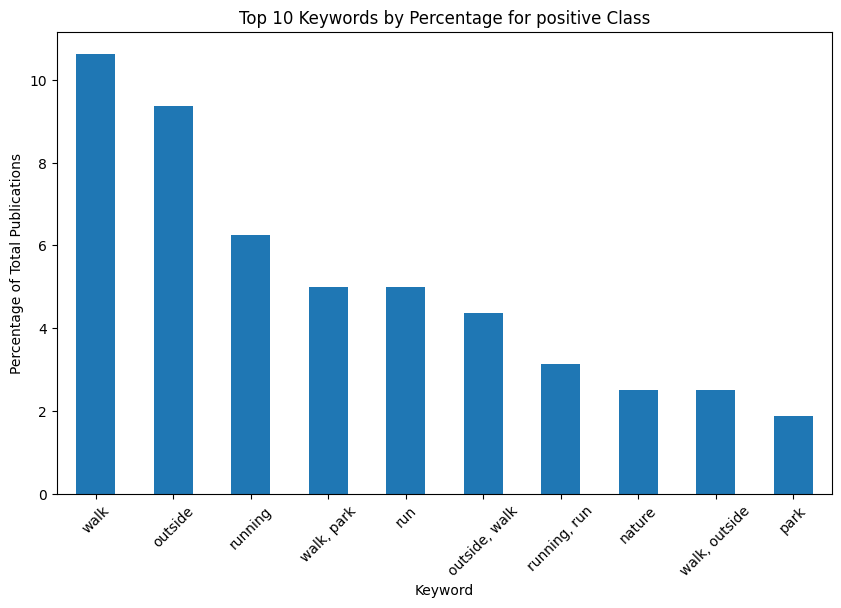

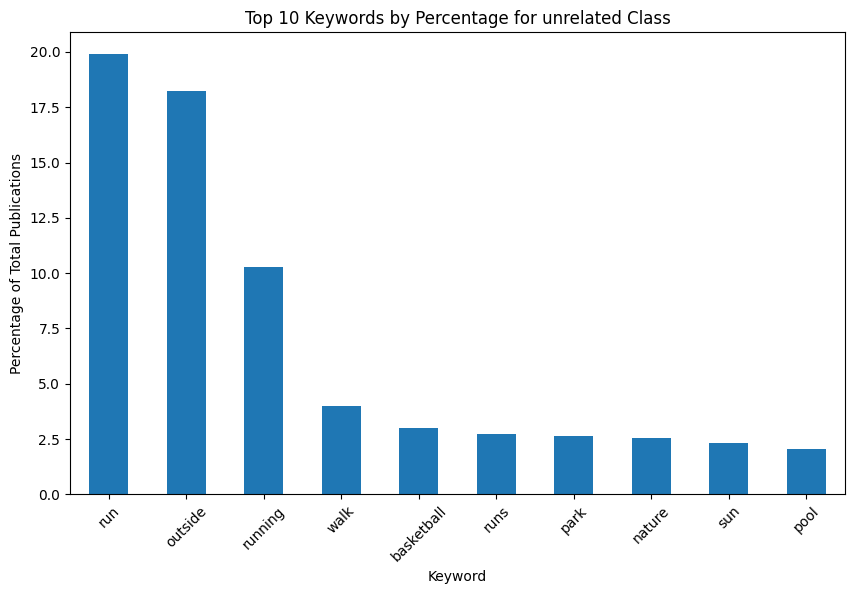

In [3]:
# Group the data by label and keyword, and count the number of occurrences
keyword_counts_by_class = df.groupby(['label', 'keyword']).size().unstack(fill_value=0)

# Calculate the total number of publications for each class
total_publications_per_class = keyword_counts_by_class.sum(axis=1)

# Convert counts to percentages
keyword_percentages_by_class = keyword_counts_by_class.div(total_publications_per_class, axis=0) * 100

# Plot the 10 most frequent keywords (by percentage) for each class
for label in keyword_percentages_by_class.index:
    plt.figure(figsize=(10, 6))
    keyword_percentages_by_class.loc[label].sort_values(ascending=False).head(10).plot(kind='bar')
    plt.title(f'Top 10 Keywords by Percentage for {label} Class')
    plt.xlabel('Keyword')
    plt.ylabel('Percentage of Total Publications')
    plt.xticks(rotation=45)
    plt.show()

## Text length analysis

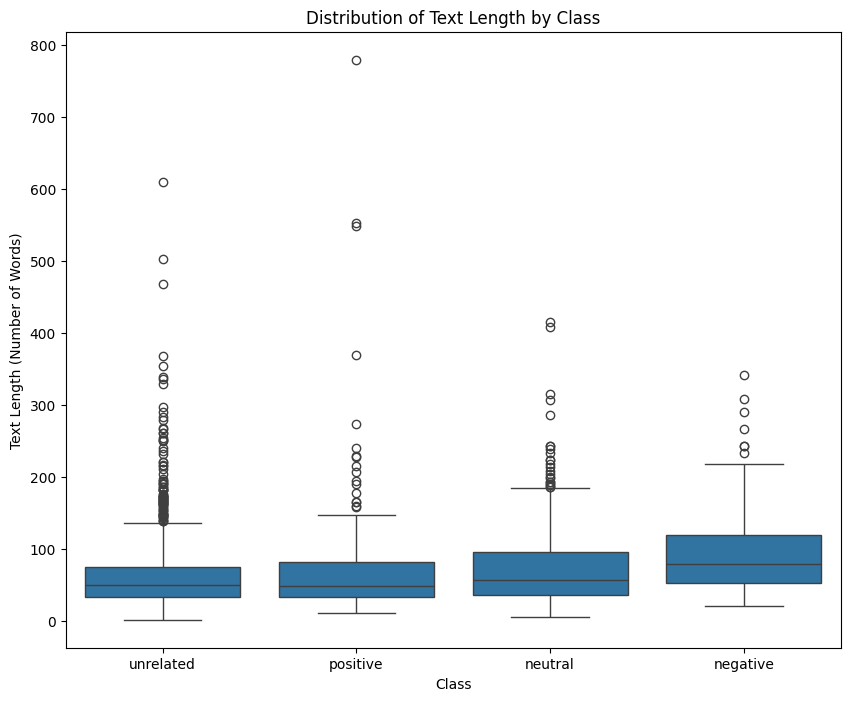

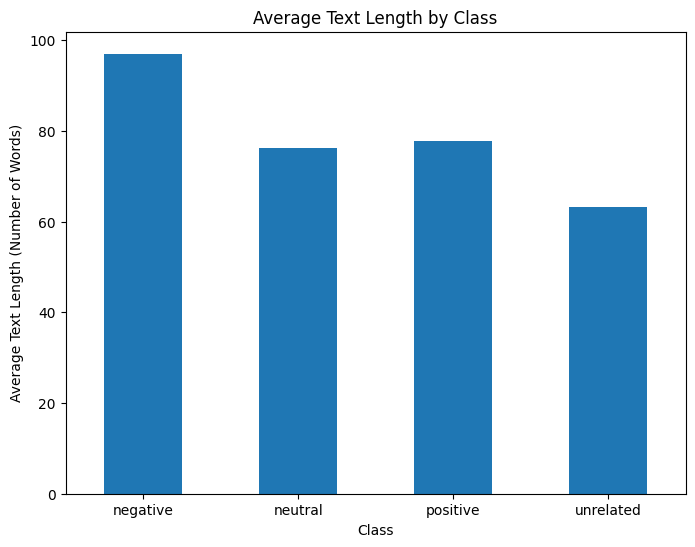

In [4]:
import seaborn as sns

# Calculate the length of each post (number of words)
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

# Create a boxplot to visualize the distribution of text length for each class
plt.figure(figsize=(10, 8))
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Distribution of Text Length by Class')
plt.xlabel('Class')
plt.ylabel('Text Length (Number of Words)')
plt.show()

# Calculate the average text length for each class
avg_text_length = df.groupby('label')['text_length'].mean()

# Create a bar plot to visualize the average text length for each class
plt.figure(figsize=(8, 6))
avg_text_length.plot(kind='bar')
plt.title('Average Text Length by Class')
plt.xlabel('Class')
plt.ylabel('Average Text Length (Number of Words)')
plt.xticks(rotation=0)
plt.show()

# Result: Negative texts tend to be longer, positive texts tend to be shorter.



Result: Negative texts tend to be longer, positive texts tend to be shorter.

## Most common words per class

In [5]:
from collections import Counter
from nltk.corpus import stopwords   # Import the stop words from NLTK

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Function to get the most common words for each class, excluding stopwords
def get_most_common_words(df, label, n=10):
    # Filter the DataFrame for the given label
    df_filtered = df[df['label'] == label]
    
    # Concatenate all the text for this label
    all_text = ' '.join(df_filtered['text'])
    
    # Split the text into words, remove stopwords, and count the occurrences
    word_counts = Counter(word for word in all_text.split() if word.lower() not in stop_words)
    
    # Get the n most common words
    most_common_words = word_counts.most_common(n)
    
    return most_common_words

# Get the most common words for each class, excluding stopwords
for label in df['label'].unique():
    print(f"Most common words for {label} (excluding stopwords):")
    print(get_most_common_words(df, label))
    print()

Most common words for unrelated (excluding stopwords):
[('like', 478), ('people', 325), ("I'm", 306), ('outside', 286), ('get', 285), ('run', 276), ('go', 237), ('would', 213), ('think', 207), ('feel', 202)]

Most common words for positive (excluding stopwords):
[('go', 87), ('like', 75), ('people', 61), ('get', 48), ('outside', 47), ('anxiety', 47), ('would', 47), ("I'm", 46), ('feel', 45), ('going', 44)]

Most common words for neutral (excluding stopwords):
[('like', 215), ('outside', 198), ('go', 196), ("I'm", 137), ('people', 127), ('get', 115), ('going', 103), ('would', 98), ('really', 90), ('even', 86)]

Most common words for negative (excluding stopwords):
[('like', 96), ('outside', 85), ("I'm", 80), ('people', 77), ('go', 75), ('feel', 71), ('get', 52), ('going', 51), ('even', 49), ('walk', 46)]



## Sentiment Analysis

label
negative    -0.039454
neutral      0.036981
positive     0.115829
unrelated    0.048909
Name: sentiment, dtype: float64


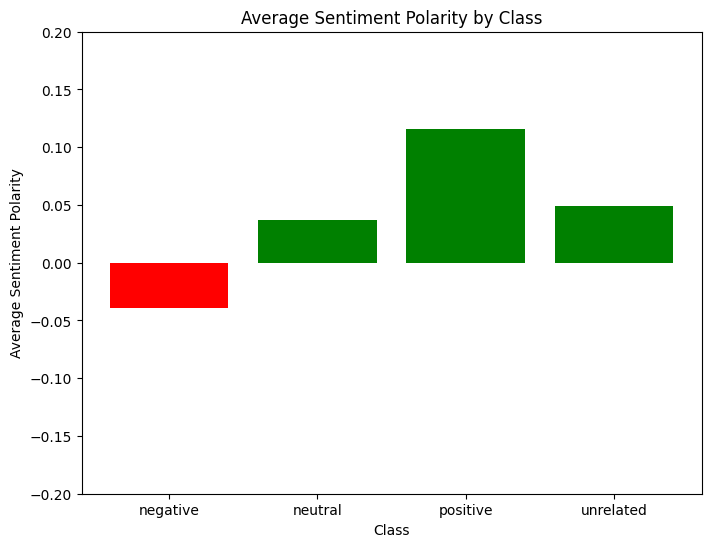

In [6]:
from textblob import TextBlob

# Function to get the sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to get the sentiment polarity for each post
df['sentiment'] = df['text'].apply(get_sentiment)

# Analyze the average sentiment for each class
average_sentiment_by_class = df.groupby('label')['sentiment'].mean()
print(average_sentiment_by_class)

# Define a function to choose the bar color based on sentiment polarity
def bar_color(sentiment):
    return 'green' if sentiment > 0 else 'red'

# Plot the average sentiment polarity for each class with custom bar colors
plt.figure(figsize=(8, 6))
plt.bar(average_sentiment_by_class.index, average_sentiment_by_class, 
        color=[bar_color(s) for s in average_sentiment_by_class])
plt.title('Average Sentiment Polarity by Class')
plt.xlabel('Class')
plt.ylabel('Average Sentiment Polarity')
plt.ylim(-0.2, 0.2)  # Adjust y-axis limits to better visualize the differences
plt.xticks(rotation=0)
plt.show()

### Sentiment Analysis with nltk VADER

label
negative    -0.120287
neutral      0.094425
positive     0.382277
unrelated    0.101992
Name: vader_sentiment, dtype: float64


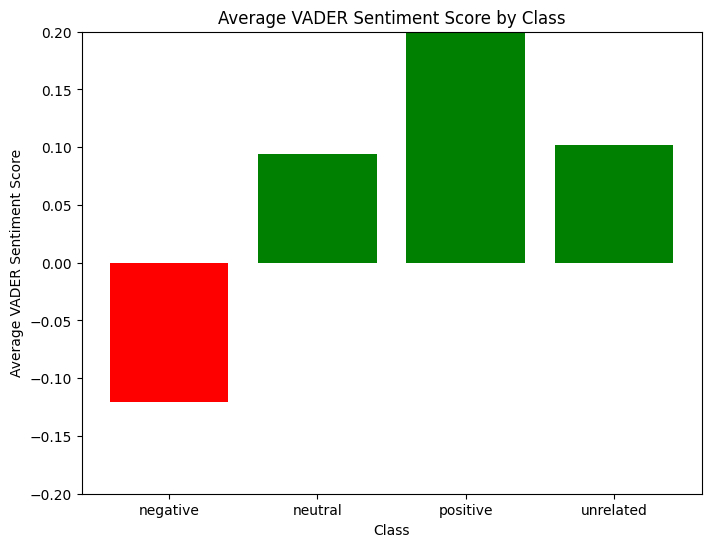

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk

# nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score
def get_vader_sentiment(text):
    return sid.polarity_scores(text)['compound']

# Apply the function to get the compound sentiment score for each post
df['vader_sentiment'] = df['text'].apply(get_vader_sentiment)

# Analyze the average sentiment for each class
average_vader_sentiment_by_class = df.groupby('label')['vader_sentiment'].mean()
print(average_vader_sentiment_by_class)


# Plot the average sentiment polarity for each class with custom bar colors
plt.figure(figsize=(8, 6))
plt.bar(average_vader_sentiment_by_class.index, average_vader_sentiment_by_class, 
        color=[bar_color(s) for s in average_vader_sentiment_by_class])
plt.title('Average VADER Sentiment Score by Class')
plt.xlabel('Class')
plt.ylabel('Average VADER Sentiment Score')
plt.ylim(-0.2, 0.2)  # Adjust y-axis limits to better visualize the differences
plt.xticks(rotation=0)
plt.show()